In [1]:
#importing 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing liberaries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
data=pd.read_csv('train.csv')

In [4]:
#calling data
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [5]:
df=pd.DataFrame(data)

In [6]:
#calling first 10 data
df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [7]:
#calling last 5 data
df.tail(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [8]:
#cheking shape
df.shape

(15120, 56)

In [9]:
#calling columns
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [10]:
#cheking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [11]:
#isnull
df.isnull()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#cheking duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

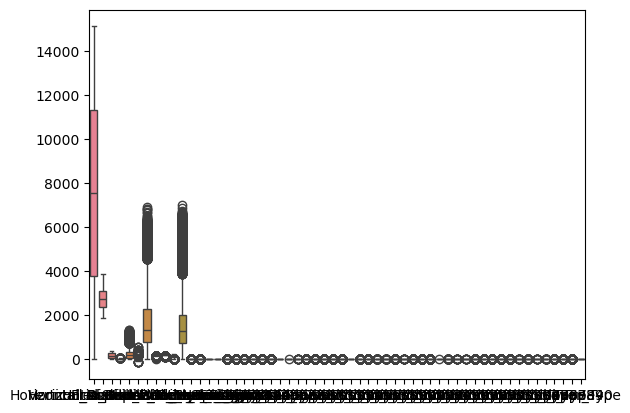

In [13]:
#cheking boxplot
sns.boxplot(data=df)

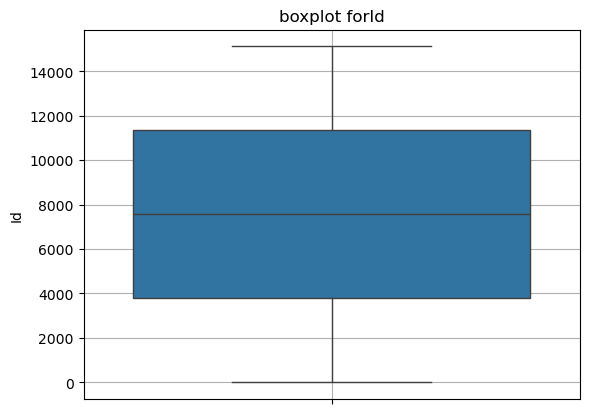

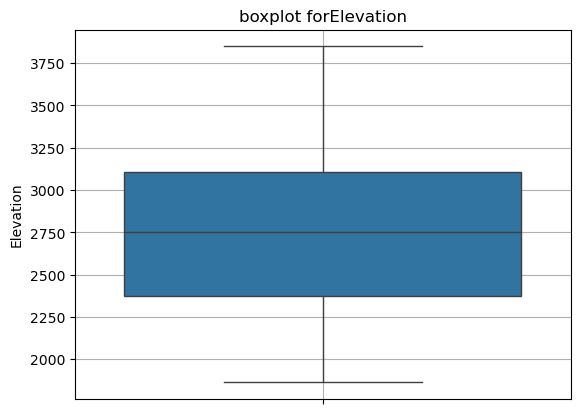

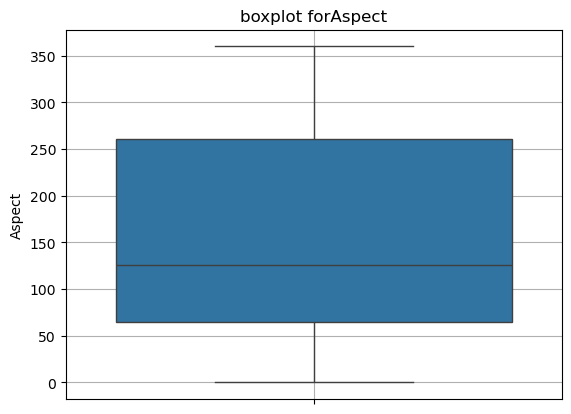

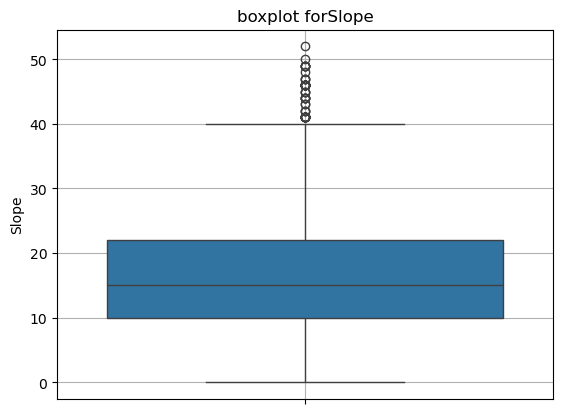

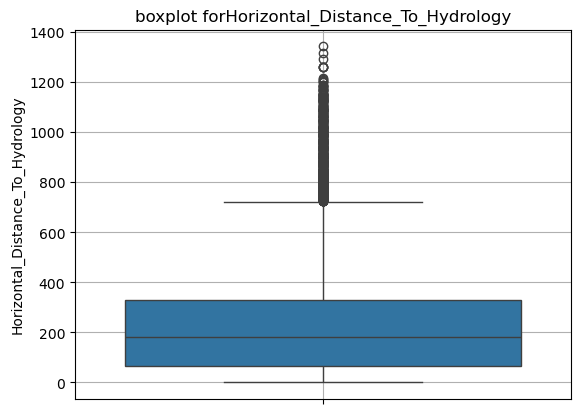

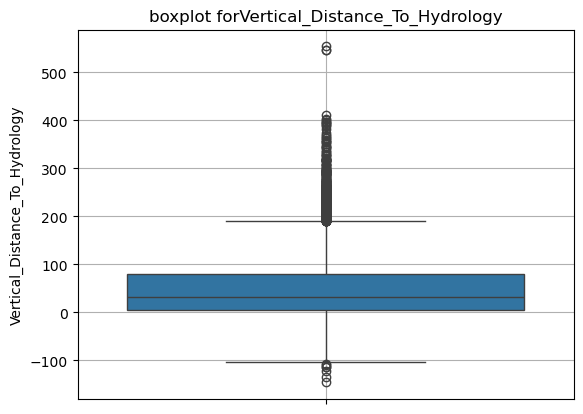

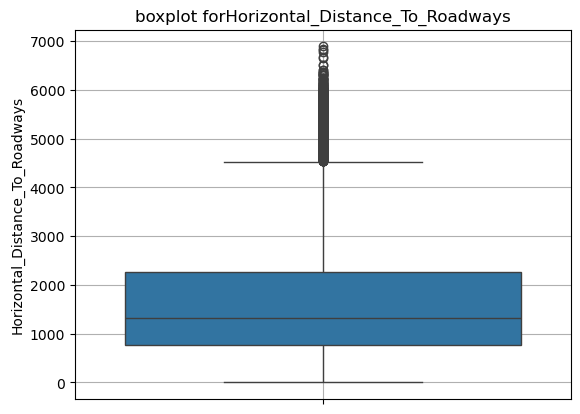

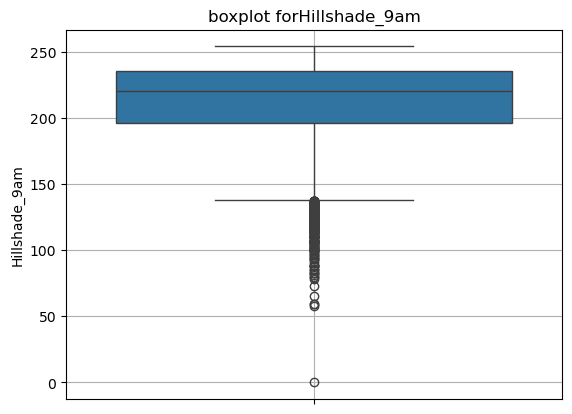

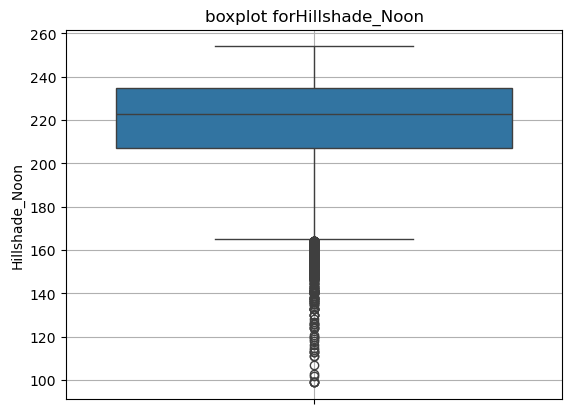

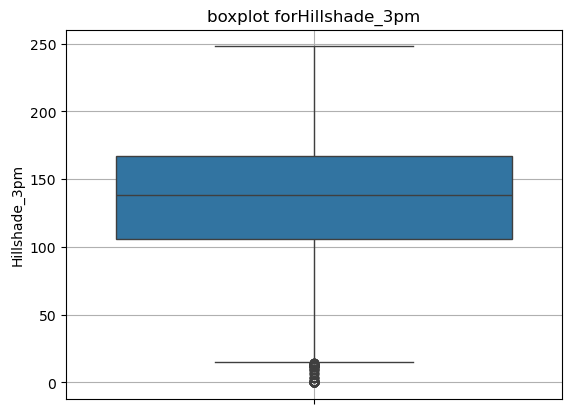

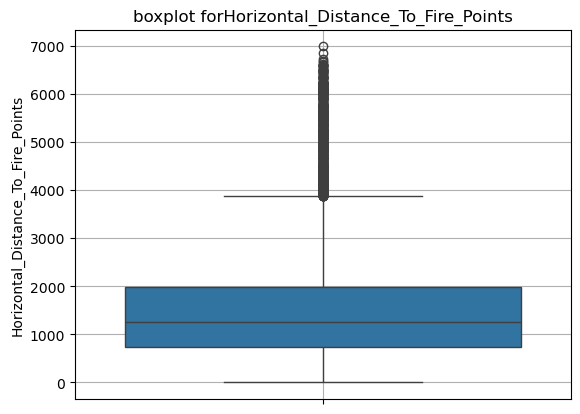

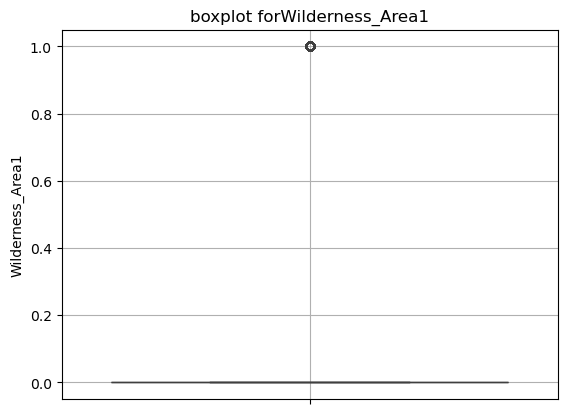

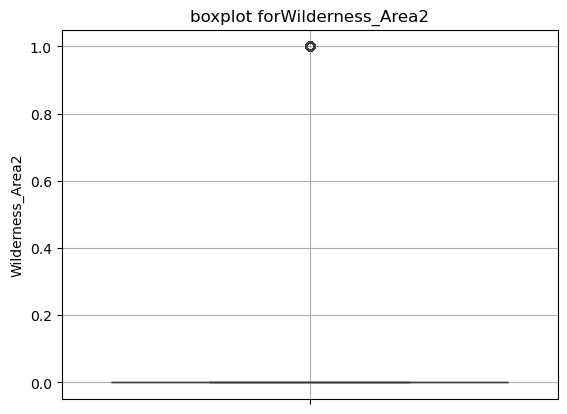

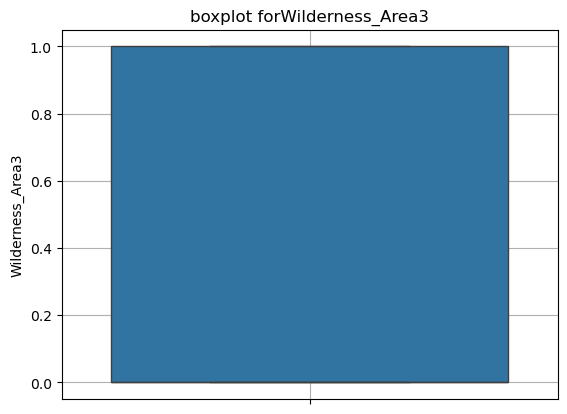

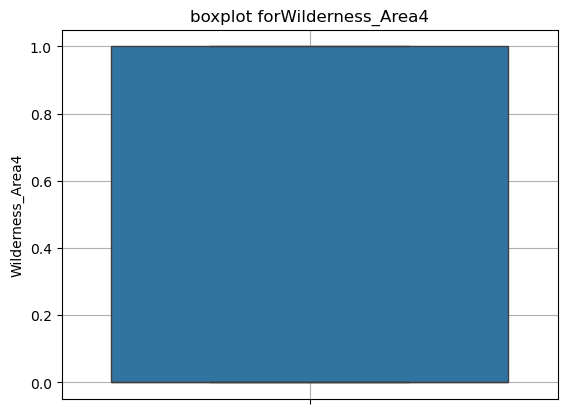

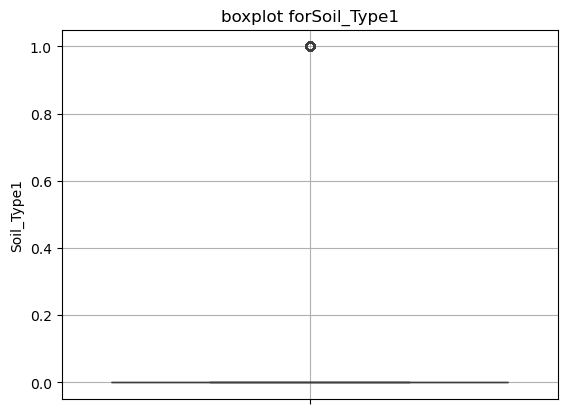

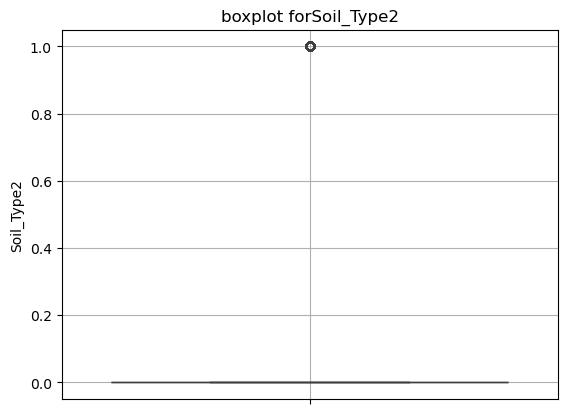

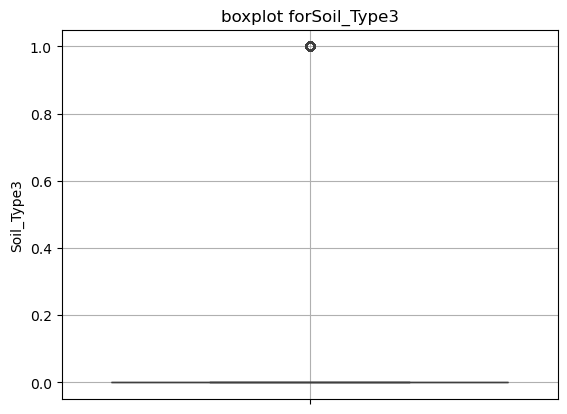

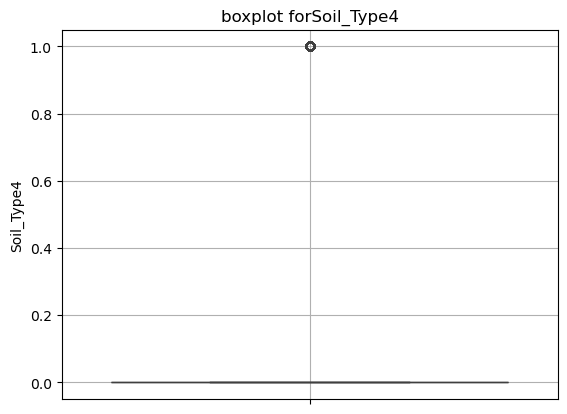

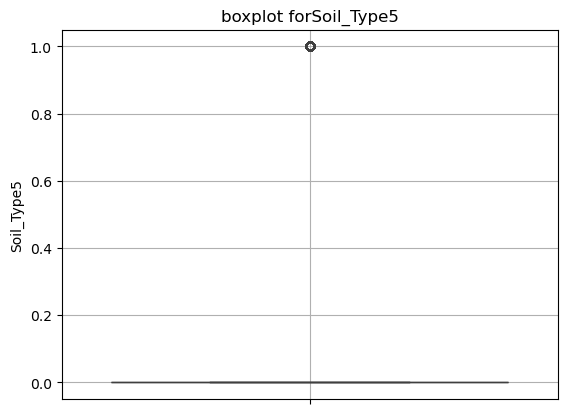

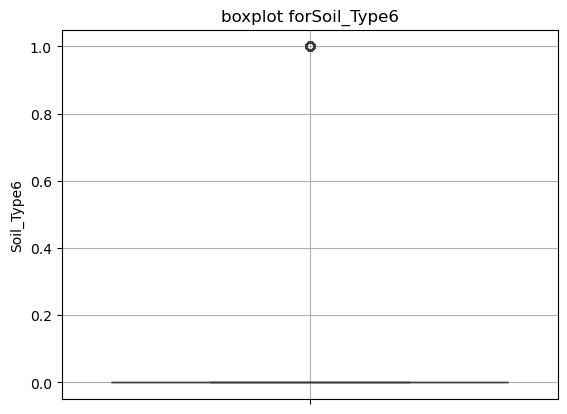

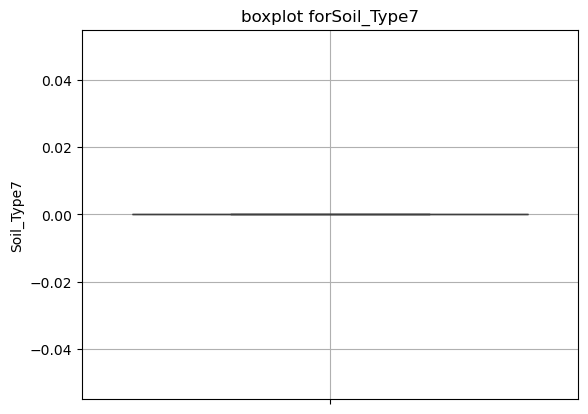

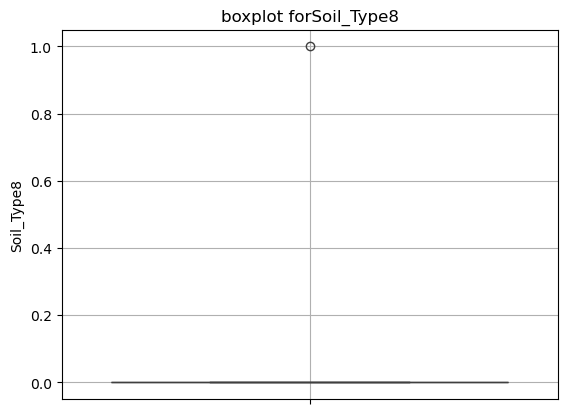

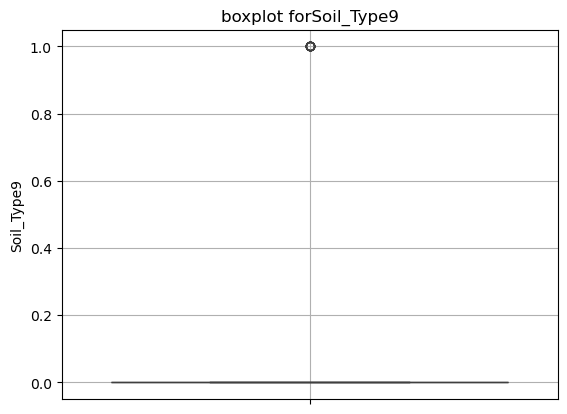

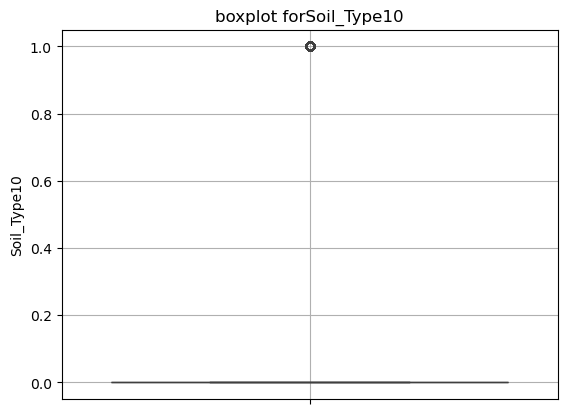

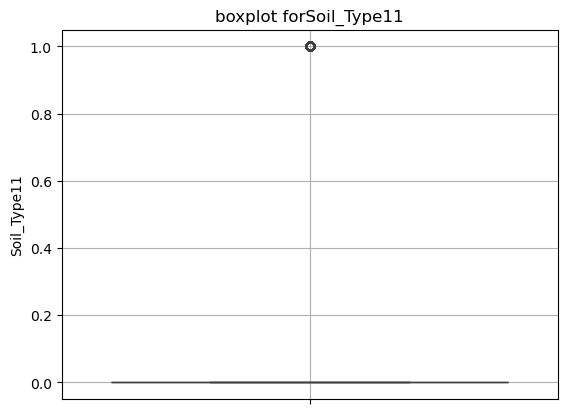

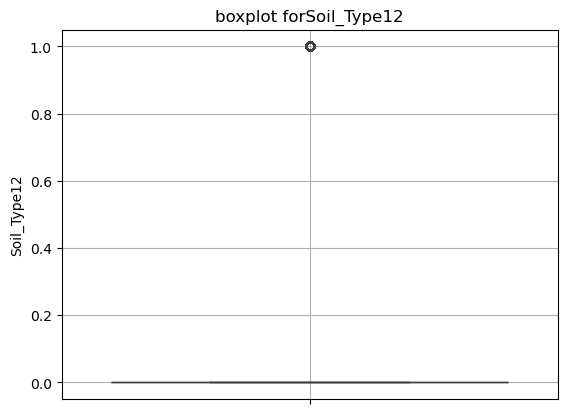

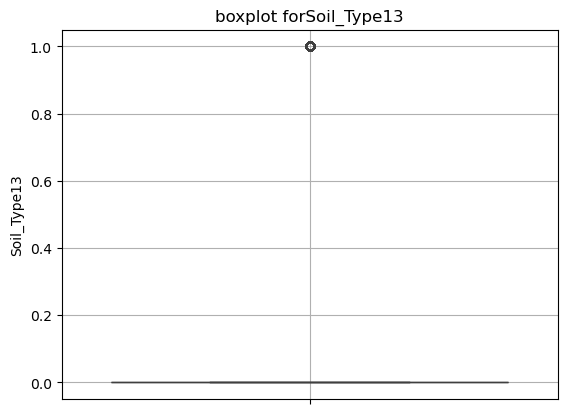

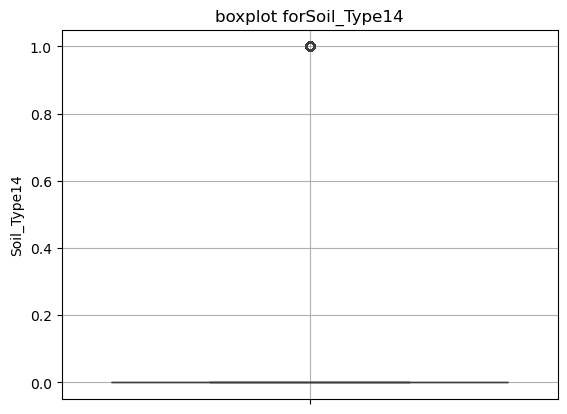

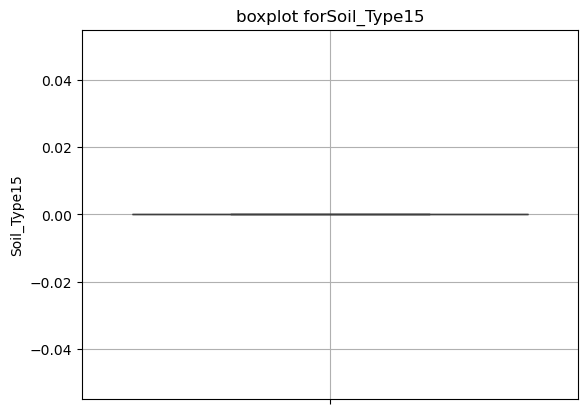

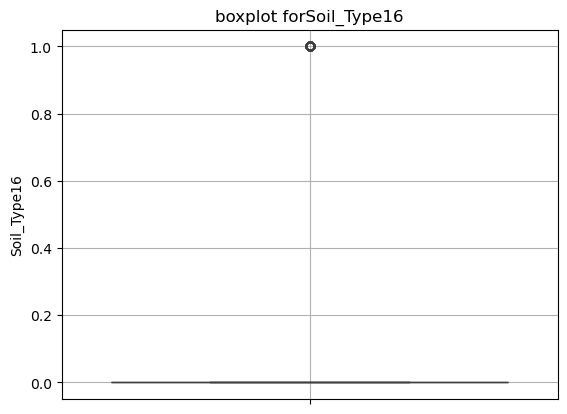

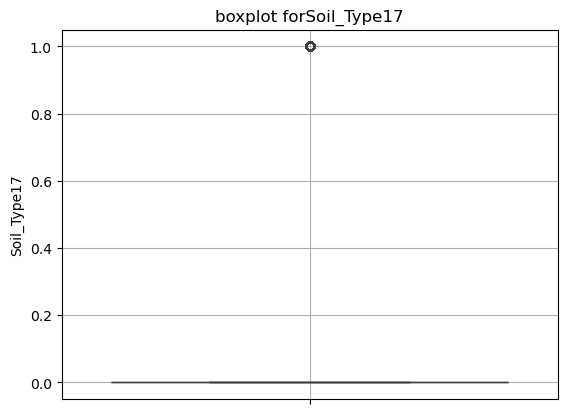

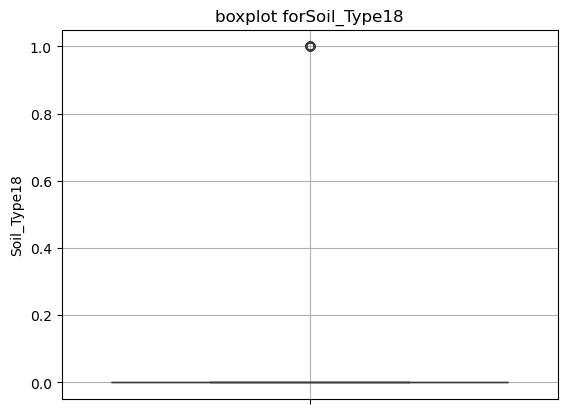

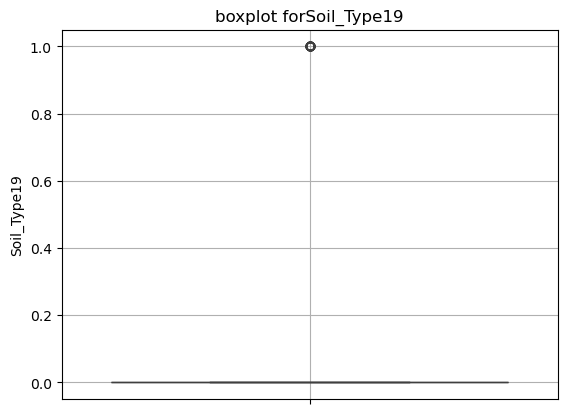

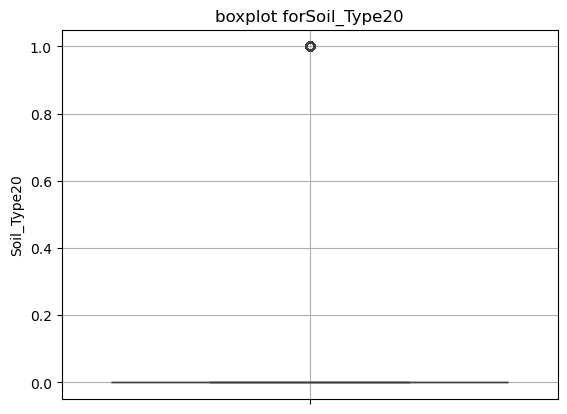

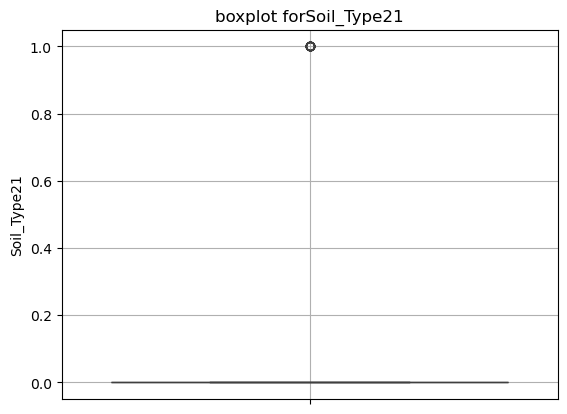

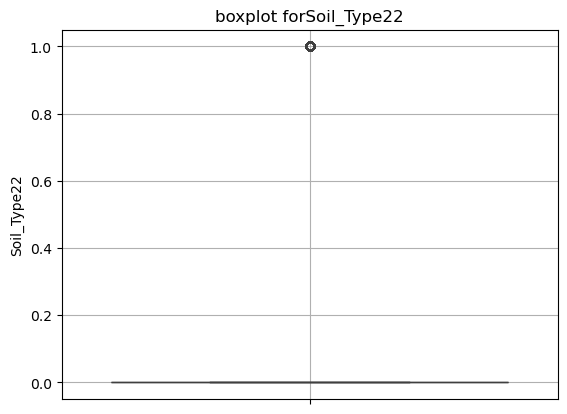

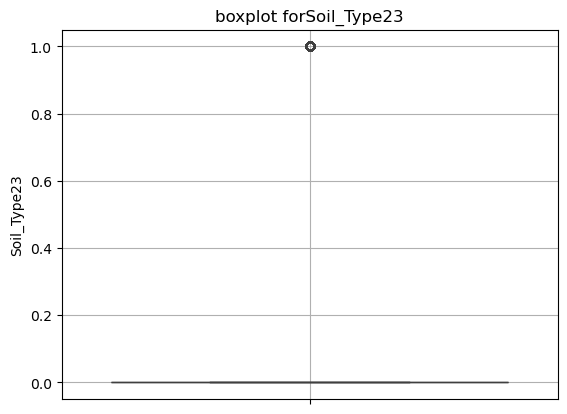

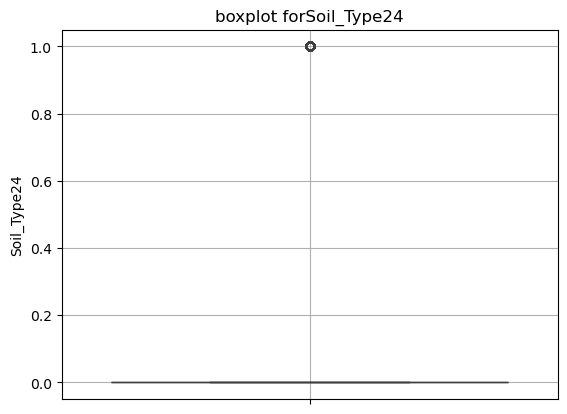

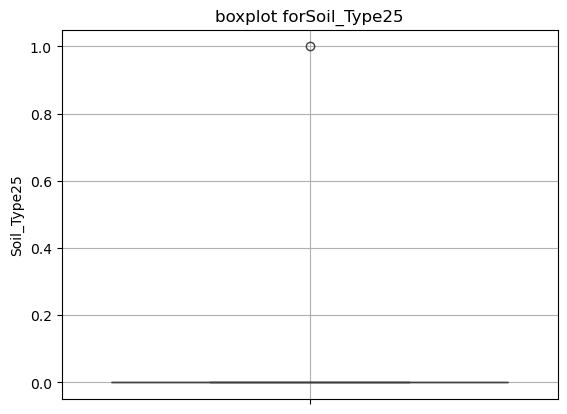

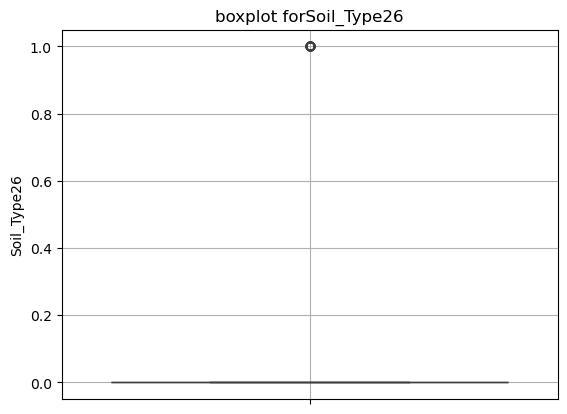

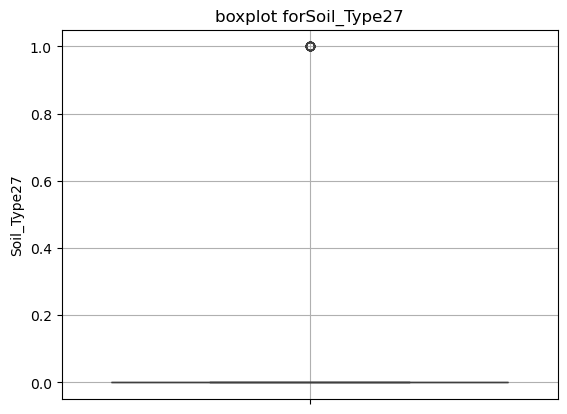

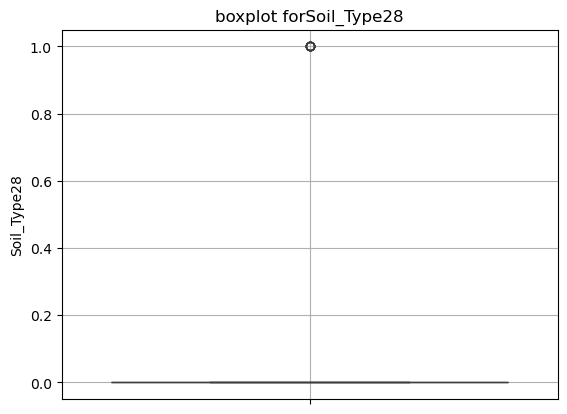

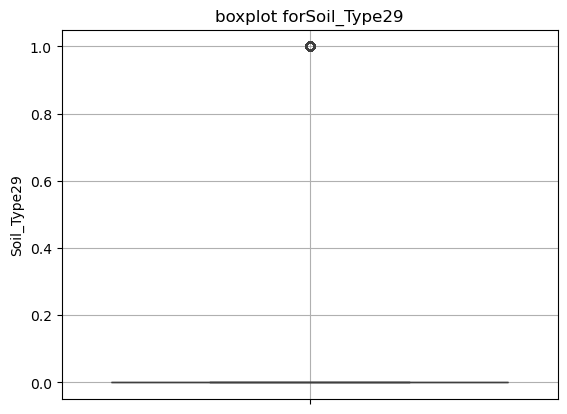

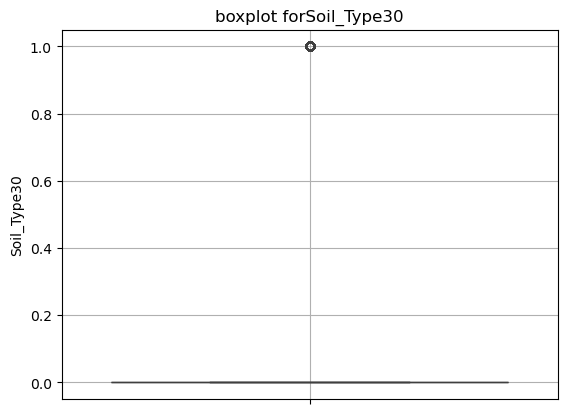

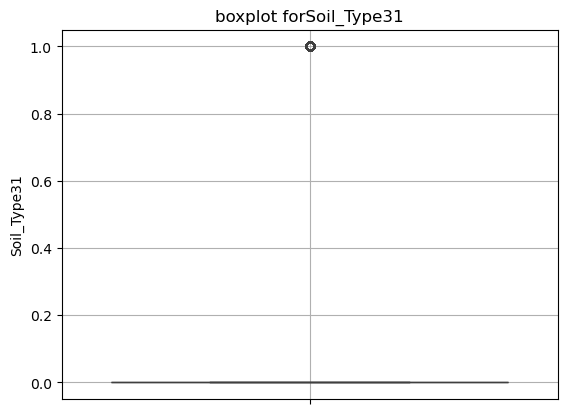

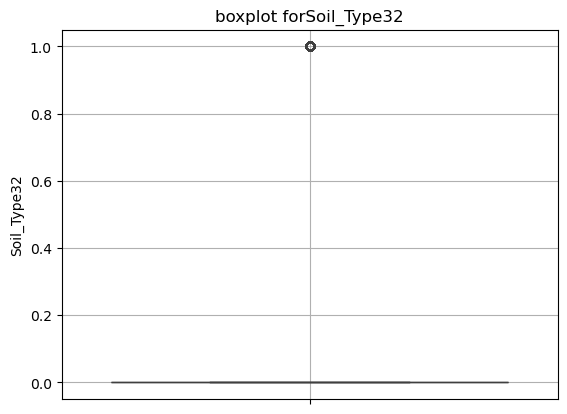

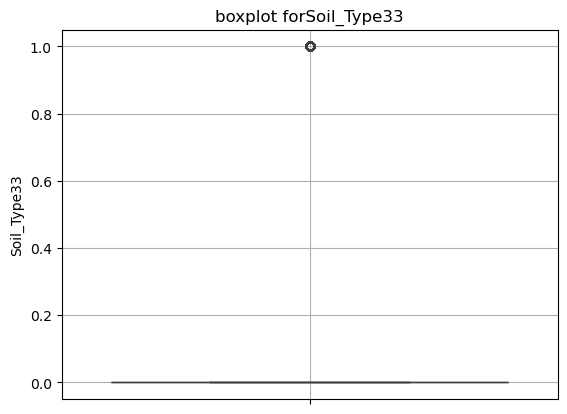

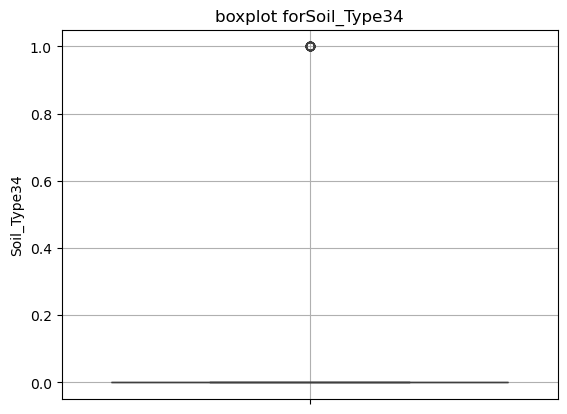

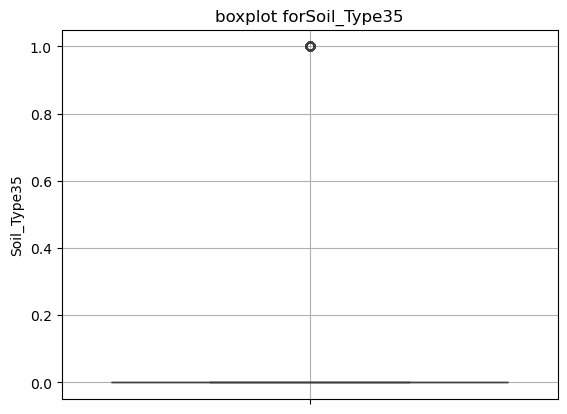

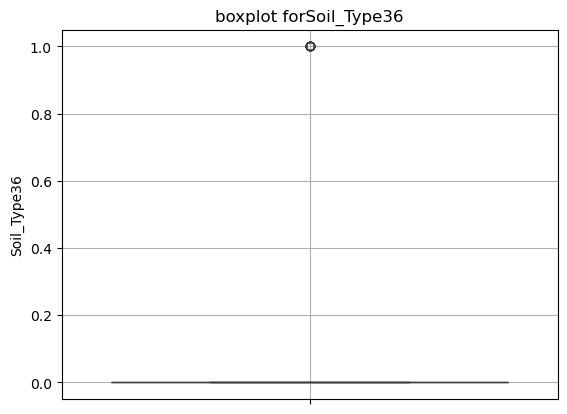

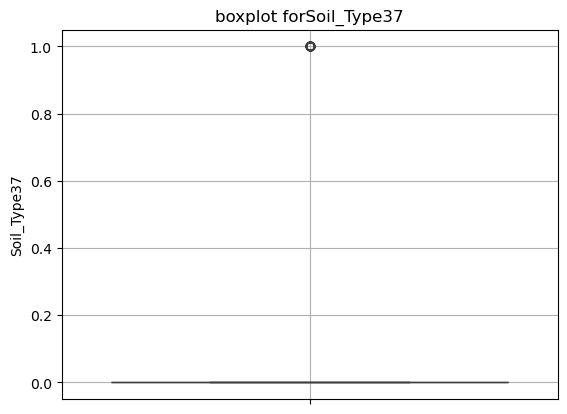

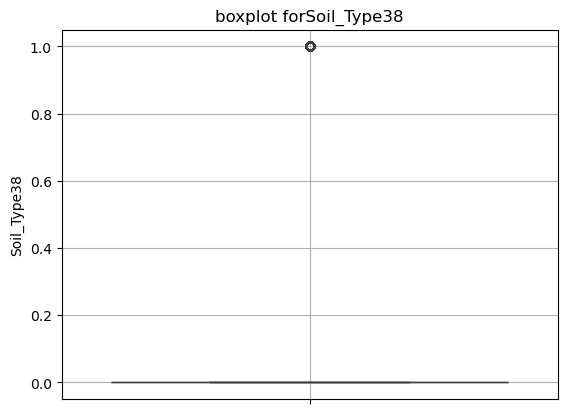

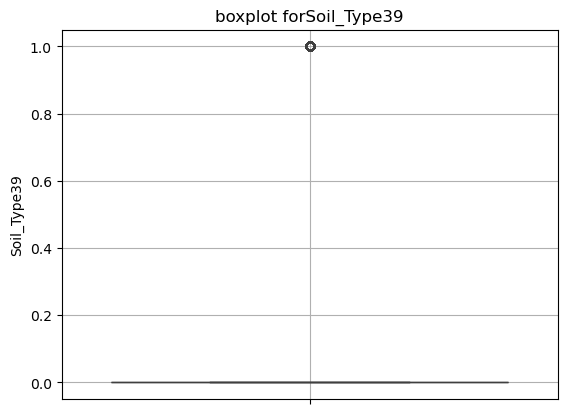

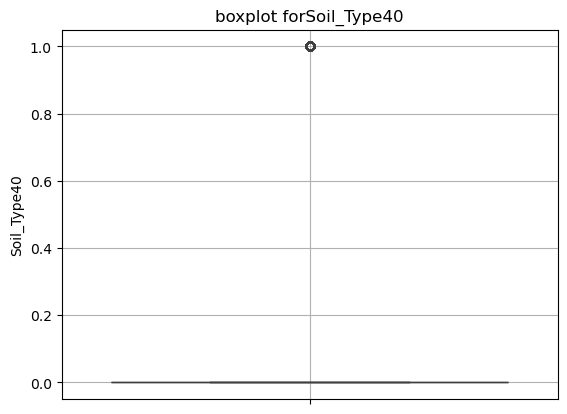

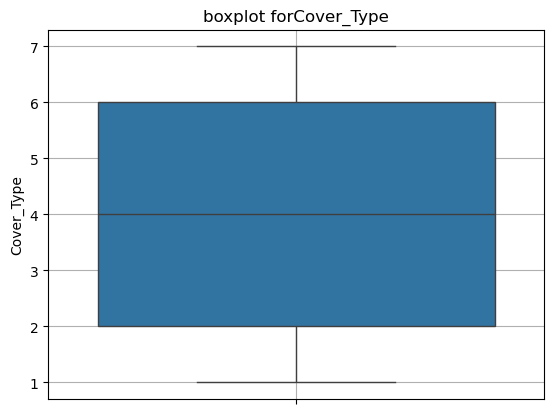

In [14]:
num_col=df.select_dtypes(include='number').columns #handling outliers
for col in num_col:
    sns.boxplot(data=df,y=col)
    plt.title(f'boxplot for{col}')
    plt.grid(True)
    plt.show()

In [15]:
def handling_outliers(df): #handling outliers
    for col in df.select_dtypes(include='number').columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        #Capping
        df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound
                           if x>upper_bound else x)
        return df

In [16]:
df1=handling_outliers(df) #calling outlier function
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


<Axes: >

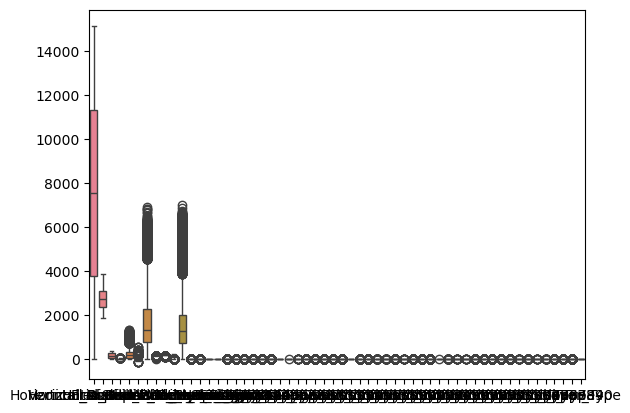

In [17]:
sns.boxplot(df1)    #boxplot

In [18]:
import numpy as np

def handling_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df


In [19]:
df1=handling_outliers(df)
df1

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1.0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2.0,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3.0,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4.0,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,5.0,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116.0,2607.0,243.0,23.0,258.0,7.0,660.0,170.0,251.0,214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15116,15117.0,2603.0,121.0,19.0,633.0,190.0,618.0,249.0,221.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15117,15118.0,2492.0,134.0,25.0,365.0,117.0,335.0,250.0,220.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15118,15119.0,2487.0,167.0,28.0,218.0,101.0,242.0,229.0,237.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


<Axes: >

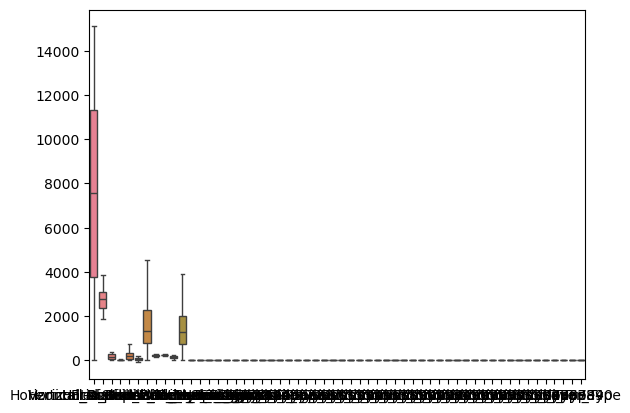

In [20]:
sns.boxplot(data=df1) #boxplot

In [21]:
c=df1.corr(numeric_only=True) #cheking correlation 
c

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.019229,0.092606,0.049104,-0.012674,-0.003061,0.069335,0.041950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.314299,0.407687,0.099165,0.598196,0.089899,0.216347,0.089180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028775,0.039366,0.056639,0.063136,-0.601753,0.328101,0.637445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008015
Slope,-0.019229,-0.314299,0.028775,1.000000,-0.048482,0.287856,-0.278275,-0.175204,-0.599833,-0.322319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087562
Horizontal_Distance_To_Hydrology,0.092606,0.407687,0.039366,-0.048482,1.000000,0.639864,0.186850,-0.036764,0.076606,0.076385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.032788
Vertical_Distance_To_Hydrology,0.049104,0.099165,0.056639,0.287856,0.639864,1.000000,-0.012019,-0.087253,-0.143315,-0.047248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070098
Horizontal_Distance_To_Roadways,-0.012674,0.598196,0.063136,-0.278275,0.186850,-0.012019,1.000000,-0.008890,0.243323,0.173190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.089009
Hillshade_9am,-0.003061,0.089899,-0.601753,-0.175204,-0.036764,-0.087253,-0.008890,1.000000,-0.038099,-0.791884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013899
Hillshade_Noon,0.069335,0.216347,0.328101,-0.599833,0.076606,-0.143315,0.243323,-0.038099,1.000000,0.613814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099441
Hillshade_3pm,0.041950,0.089180,0.637445,-0.322319,0.076385,-0.047248,0.173190,-0.791884,0.613814,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.053163


<Axes: >

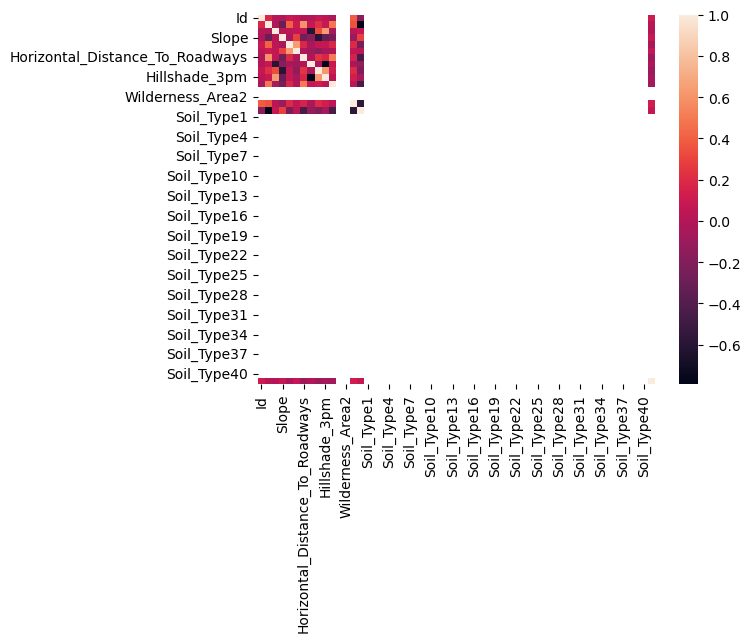

In [22]:
sns.heatmap(c)       #heatmap

In [23]:
df1.info() #cheking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  15120 non-null  float64
 1   Elevation                           15120 non-null  float64
 2   Aspect                              15120 non-null  float64
 3   Slope                               15120 non-null  float64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 5   Vertical_Distance_To_Hydrology      15120 non-null  float64
 6   Horizontal_Distance_To_Roadways     15120 non-null  float64
 7   Hillshade_9am                       15120 non-null  float64
 8   Hillshade_Noon                      15120 non-null  float64
 9   Hillshade_3pm                       15120 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 11  Wilderness_Area1                    15120

In [24]:
y=df1['Cover_Type']

In [25]:
x=df1.drop('Cover_Type',axis=1)

In [26]:
x.columns #listing columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=13)  # select top 13 features

X_new = selector.fit_transform(x, y)

# Get selected feature names
selected_features = x.columns[selector.get_support()]

print("Top Selected Features:")
print(selected_features)

Top Selected Features:
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4'],
      dtype='object')


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [11 12 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [28]:
x= x[selected_features]

In [29]:
x.columns   #listing columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4'],
      dtype='object')

In [30]:
x_train,x_test,y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape

(12096, 13)

In [32]:
x_test.shape

(3024, 13)

In [33]:
y_train.shape

(12096,)

In [34]:
y_test.shape


(3024,)

In [35]:
scaler=StandardScaler()
x_trains=scaler.fit_transform(x_train)
x_tests=scaler.fit_transform(x_test)

In [36]:
# Train and evaluate multiple models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    print('\nTraining', name)
    model.fit(x_trains, y_train)
    preds = model.predict(x_tests)
    acc = accuracy_score(y_test, preds)
    print(f'Accuracy on test set: {acc:.4f}')
    print('Classification report:')
    print(classification_report(y_test, preds))
    results[name] = {'model': model, 'accuracy': acc}

res_df = pd.DataFrame({k: {'accuracy': v['accuracy']} for k,v in results.items()}).T.sort_values('accuracy', ascending=False)
print('\nModel comparison:')
display(res_df)
    


Training LogisticRegression
Accuracy on test set: 0.6677
Classification report:
              precision    recall  f1-score   support

         1.0       0.63      0.64      0.63       421
         2.0       0.58      0.48      0.52       438
         3.0       0.60      0.45      0.51       428
         4.0       0.74      0.84      0.79       449
         5.0       0.66      0.78      0.72       416
         6.0       0.58      0.60      0.59       432
         7.0       0.85      0.87      0.86       440

    accuracy                           0.67      3024
   macro avg       0.66      0.67      0.66      3024
weighted avg       0.66      0.67      0.66      3024


Training SVM
Accuracy on test set: 0.7609
Classification report:
              precision    recall  f1-score   support

         1.0       0.70      0.69      0.70       421
         2.0       0.74      0.57      0.65       438
         3.0       0.69      0.60      0.64       428
         4.0       0.80      0.96      

,accuracy
RandomForest,0.864749
GradientBoosting,0.810516
SVM,0.760913
LogisticRegression,0.667659


In [38]:
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model = models[best_model_name]


In [39]:
print(f"Best Model: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']})")



Best Model: RandomForest (Accuracy: 0.8647486772486772)


In [41]:
import joblib
# Save the best model using joblib
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Model saved as '{best_model_name}_best_model.pkl'")

Model saved as 'RandomForest_best_model.pkl'
